<a href="https://colab.research.google.com/github/unoguk/unoguk/blob/main/Colaboratory%EC%97%90_%EC%98%A4%EC%8B%A0_%EA%B2%83%EC%9D%84_%ED%99%98%EC%98%81%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

print('훈련용 리뷰 개수 : {}'.format(len(X_train)))
print('테스트용 리뷰 개수 : {}'.format(len(X_test)))
num_classes = len(set(y_train))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [3]:
from tensorflow.keras.datasets import imdb
import tensorflow as tf
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 20000) #단어 1만개만 사용
# labels는 부정은 0, 긍정은 1을 나타내는 리스트
print('훈련용 리뷰 개수 : {}'.format(len(train_data)))
print('테스트용 리뷰 개수 : {}'.format(len(test_data)))
num_classes = len(set(train_labels))
print('카테고리 : {}'.format(num_classes))

훈련용 리뷰 개수 : 25000
테스트용 리뷰 개수 : 25000
카테고리 : 2


In [ ]:
train_data[0]

In [6]:
train_labels[0]

1

3.4.2 Data 준비

In [8]:
## 신경망에 숫자 리스트를 주입할 수 없음, 리스트를 텐서로 바꾸는 두가지 방법
#같은 길이가 되도록 리스트에 패딩(padding)을 추가하고 (sample, sequence_length) 크기 의 정수 텐서로 변환 > 정수 텐서를 다룰 수 있는 층을 신경망의 첫 번째 층으로 사용(embedding층)
# 2. 리스트를 원-핫 인고팅 하여 0과 1의 벡터로 변환, 그 다음 부동 소수 벡터 데이터를 다룰 수 있는 Dense 층을 신경망의 첫 번째 층으로 사용

In [4]:
#코드 3-2 정수 시퀀스를 이진 행렬로 인코딩하기 텐서는 (25000,10000)
import numpy as np

def vectorize_sequences(sequences, dimension = 20000):#dimension=10000):
  results = np.zeros((len(sequences),dimension)) #크기가 (len(sequences, dimension))이고 모든 원소가 0인 행렬을 만든다.
  for i, sequence in enumerate(sequences):
    results[i,sequence] =1. #results[i]에서 특정 인덱스의 위치를 1로 만듭니다.
    return results

x_train = vectorize_sequences(train_data) #train data 벡터 변환
x_test = vectorize_sequences(test_data) #test data 벡터 변환

In [6]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [5]:
#label은 쉽게 벡터로 바꿀수 있다.
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [23]:
print('테스트용 리뷰 개수 : {}'.format(len(y_test)))

테스트용 리뷰 개수 : 25000


3.4.3 신경망 모델 만들기

In [ ]:
## 입력데이터가 벡터고 레이블은 스칼라(0 또는 1), 이 문제에서 가장 작 잘동하는 네트워크는 relu activative function를 사용한 완전 연결층(Dense(16, activation='relu'))을 그냥 쌓은것
# Dense 층에 전달한 매개변수(16)은 hidden unit의 개수
# Dense 층을 쌓을 때 두가지 중요한 구조상의 결정
## 1. 얼마나 많은 층을 사용할 것인가? 2. 각 층에 얼마나 많은 은닉 유닛을 둘 것인가?


In [6]:
#model 정의하기
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(20000,)))#input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

손실함수와 optimizer 선택, 이진분류문제이므로 binary_cross entropy 손실이 적합

In [8]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [14]:
from tensorflow.keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [57]:
# optimizer 설정하기
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=0.001), #learning rate = lr
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [25]:
#훈련검증
#validataion set 준비
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [27]:
print('테스트용 리뷰 개수 : {}'.format(len(y_val)))
print('테스트용 리뷰 개수 : {}'.format(len(partial_y_train)))

테스트용 리뷰 개수 : 10000
테스트용 리뷰 개수 : 15000


In [29]:
# 512 sample씩  20 batch를 만들어 20번의 epoch : x_train, y_train 텐서에 있는 모든 샘풀에 대해 20번 반복하고 동시에 따로 떼어놓은 1만개의 샘플에서 손실과 정확도를 측정
model.compile(optimizer = 'RMSprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 500,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 3s 82ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 3s 116ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 4s 122ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 5s 167ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 2s 80ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 2s 77ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 2s 77ms/step - loss: 0.6931 - accuracy: 0.5035 - val_loss: 0.6932 - val_accuracy: 0.4947
Epoch 8/20

In [53]:
#summary처럼 history속성을 가지고 있는 딕셔너리
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## 훈련과 검증 손실 그리기

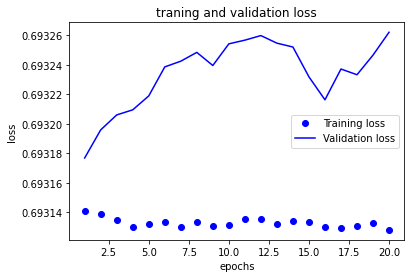

In [54]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1,len(loss) + 1 ) # epoch수 파이썬은 0부터 시작이기에 1을 주고 끝에다가 1을 더함

plt.plot(epochs, loss, 'bo', label='Training loss') #bo는 파란점, 점의 뜻은 training loss
plt.plot(epochs, val_loss, 'b', label='Validation loss') #b는 파란색 실선, 선의 제목은 validation loss
plt.title('traning and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

##훈련과 검증 정확도 그리기

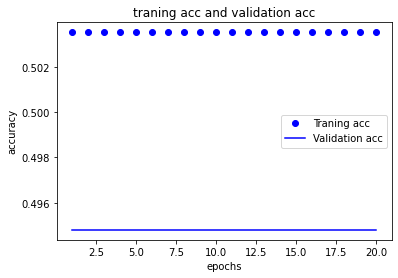

In [55]:
plt.clf() # 그래프 초기화
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Traning acc') #bo는 파란점, 점의 뜻은 training loss
plt.plot(epochs, val_acc, 'b', label='Validation acc') #b는 파란색 실선, 선의 제목은 validation loss
plt.title('traning acc and validation acc')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [43]:
## model 처음부터 다시 훈련하기
model = models.Sequential()
model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(16, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 56ms/step - loss: 0.6932 - accuracy: 0.4963
Epoch 2/4
49/49 [==============================] - 2s 33ms/step - loss: 0.6932 - accuracy: 0.4968
Epoch 3/4
49/49 [==============================] - 1s 29ms/step - loss: 0.6931 - accuracy: 0.5024
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.5000


In [44]:
results

[0.6931532025337219, 0.4999600052833557]

Google Drive 계정에서 스프레드시트를 비롯한 데이터를 Colab 메모장으로 가져오거나 GitHub 등의 여러 다른 소스에서 데이터를 가져올 수 있습니다. Colab을 데이터 과학에 활용하는 방법과 데이터 가져오기에 관해 자세히 알아보려면 <a href="#working-with-data">데이터 사용하기</a> 아래 링크를 참조하세요.

## 머신러닝

Colab을 사용하면 <a href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb">코드 몇 줄</a>만으로 이미지 데이터세트를 가져오고, 이 데이터세트로 이미지 분류기를 학습시키며, 모델을 평가할 수 있습니다. Colab 메모장은 Google 클라우드 서버에서 코드를 실행하므로 사용 중인 컴퓨터의 성능과 관계없이 <a href="#using-accelerated-hardware">GPU 및 TPU</a>를 포함한 Google 하드웨어의 성능을 활용할 수 있습니다. 브라우저만 있으면 사용 가능합니다.

Colab은 다음과 같은 분야의 머신러닝 커뮤니티에서 널리 쓰이고 있습니다.
- TensorFlow 시작하기
- 신경망 개발 및 학습시키기
- TPU로 실험하기
- AI 연구 보급하기
- 튜토리얼 만들기

머신러닝 적용 사례를 보여 주는 Colab 메모장 샘플을 확인하려면 아래 <a href="#machine-learning-examples">머신러닝 예시</a>를 참조하세요.

## 추가 리소스

### Colab에서 메모장 사용하기
- [Colaboratory 개요](/notebooks/basic_features_overview.ipynb)
- [Markdown 가이드](/notebooks/markdown_guide.ipynb)
- [라이브러리 가져오기 및 종속 항목 설치하기](/notebooks/snippets/importing_libraries.ipynb)
- [GitHub에서 노트 저장 및 로드하기](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [대화형 양식](/notebooks/forms.ipynb)
- [대화형 위젯](/notebooks/widgets.ipynb)
- <img src="/img/new.png" height="20px" align="left" hspace="4px" alt="New"></img>
 [Colab의 TensorFlow 2](/notebooks/tensorflow_version.ipynb)

<a name="working-with-data"></a>
### 데이터로 작업하기
- [데이터 로드: 드라이브, 스프레드시트, Google Cloud Storage](/notebooks/io.ipynb) 
- [차트: 데이터 시각화하기](/notebooks/charts.ipynb)
- [BigQuery 시작하기](/notebooks/bigquery.ipynb)

### 머신러닝 단기집중과정
다음은 Google 온라인 머신러닝 과정에서 가져온 일부 메모장입니다. <a href="https://developers.google.com/machine-learning/crash-course/">전체 과정 웹사이트</a>에서 자세한 내용을 확인하세요.
- [Pandas DataFrame 소개](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [합성 데이터를 사용하는 tf.keras 선형 회귀](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)


<a name="using-accelerated-hardware"></a>
### 가속 하드웨어 사용하기
- [GPU를 사용한 TensorFlow](/notebooks/gpu.ipynb)
- [TPU를 사용한 TensorFlow](/notebooks/tpu.ipynb)

<a name="machine-learning-examples"></a>

### 추천 예시

- <a href="https://colab.research.google.com/github/NVIDIA/NeMo/blob/stable/tutorials/VoiceSwapSample.ipynb">NeMo Voice Swap</a>: Nvidia의 NeMo 대화형 AI 툴킷을 사용하여 오디오 파일의 음성을 컴퓨터에서 생성된 음성으로 변환하세요.

- <a href="https://tensorflow.org/hub/tutorials/tf2_image_retraining">이미지 분류기 재훈련</a>: 사전에 훈련된 이미지 분류기를 기반으로 꽃을 분류하기 위한 Keras 모델을 구축합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_text_classification">텍스트 분류</a>: IMDB 영화 리뷰를 <em>긍정적인 리뷰</em> 또는 <em>부정적인 리뷰</em>로 분류합니다.
- <a href="https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization">스타일 트랜스퍼</a>: 딥 러닝을 사용하여 이미지 간에 스타일을 전이시킵니다.
- <a href="https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa">Multilingual Universal Sentence Encoder Q&amp;A</a>: 머신러닝 모델을 사용하여 SQuAD 데이터 세트의 질문에 답변합니다.
- <a href="https://tensorflow.org/hub/tutorials/tweening_conv3d">동영상 보간 유형</a>: 동영상에서 첫 프레임과 마지막 프레임 사이에 발생한 내용을 예측합니다.
